## Drawing Lines

앞선 공식을 바탕으로 선을 그려보자. 선으로 연결될 두 개의 점의 좌표를 알고 있으므로 다음과 같은 함수를 만들 수 있다.

```python
DrawLine(p0, p1, color){
    a = (y1 - y0) / (x1 - x0)
    b = y0 - a * x0
    for x in range(x0, x1 + 1):
        y = a*x + b
        canvas.putpixel(x, y, color)
}
```

<br></br>
<br></br>
<br></br>
위 함수 처리 속도를 조금 더 빠르게 만들어보자. 우리는 두 점의 좌표를 알고 있기 때문에 x가 1 증가함에 따라 y가 얼마나 증가하는지(기울기)를 알고 있다. 위 함수에서는 x가 증가할 때마다 y의 값을 계산했지만 a(기울기)값을 알기 때문에 굳이 그럴 필요가 없다.

```python
DrawLine(p0, p1, color){
    a = (y1 - y0) / (x1 - x0)
    y = y0
    for x in range(x0, x1 + 1):
        canvas.putpixel(x, y, color)
        y = y + a # 기울기를 더해주기만 하면 된다.
}
```


<br></br>
<br></br>
<br></br>

지금까지는 x0 < x1이라는 가정하에 함수를 만들었지만 그렇지 않은 경우라면 단순히 p0와 p1의 값을 바꾸어 x0 < x1로 만들어준 후 계산하면 될 것이다.

```python
DrawLine(p0, p1, color){
    if x0 > x1:
        p0, p1 = p1, p0
    a = (y1 - y0) / (x1 - x0)
    y = y0
    for x in range(x0, x1 + 1):
        canvas.putpixel(x, y, color)
        y = y + a # 기울기를 더해주기만 하면 된다.
}
```

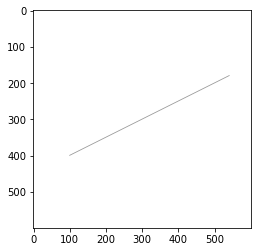

In [7]:
import numpy as np
import math
import cv2
import matplotlib.pyplot as plt

canvas_width = 600
canvas_height = 600

class Point:
    def __init__(self, x, y, color=[255,255,255]):
        self.x = x
        self.y = y
        self.color = color

point1 = Point(-200, -100)
point2 = Point(240, 120)

def draw_line(p0, p1, color):
    if p0.x > p1.x:
        p0.x, p1.x = p1.x, p0.x
        
    a = (p1.y - p0.y) / (p1.x - p0.x)
    y = p0.y
    for x in range(p0.x, p1.x + 1):
        putpixel(x, y, color)
        y = y + a

def putpixel(x, y, color):
    x = canvas_width/2 + x
    y = canvas_height/2 - y
    if (x< 0 or x >= canvas_width or y < 0 or y >= canvas_height):
        return
    cv2.line(img, (int(x), int(y)), (int(x), int(y)), (color[0], color[1], color[2]))

x = -canvas_width/2
y = -canvas_height/2

img = np.full((canvas_width,canvas_height,3), [255,255,255], dtype = np.uint8)

draw_line(point1, point2, [0,0,0])

plt.imshow(img)

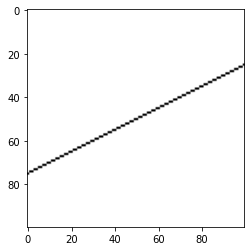

In [11]:
img2 = img[250:350, 250:350].copy()

plt.imshow(img2)